<a href="https://colab.research.google.com/github/venkat2ram/Python/blob/master/NN_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import fetch_openml

Data=fetch_openml('mnist_784')

In [0]:
X,y_actual=Data["data"][:1000]/10000,Data["target"][:1000]

In [0]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

def show_imag(X,y_actual,position):
  img=X[position]
  imag=img.reshape(int(np.sqrt(img.size)),int(np.sqrt(img.size)))
  plt.imshow(imag,cmap = matplotlib.cm.binary, interpolation="nearest")
  plt.show()
  print(y_actual[position]) 

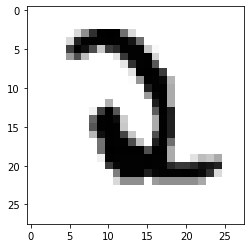

2


In [4]:
show_imag(X,y_actual,400)

In [0]:
def convert_binary(y_actual):
  y1=np.zeros((len(y_actual),10))
  for i in range(len(y_actual)):
    y1[i][int(y_actual[i])]=1
    
    
  return y1

In [0]:
NumHlayers=10
NumHunits=30

In [18]:
y=convert_binary(y_actual)
m,n=np.shape(X)
p,s=np.shape(y)
X_with_bias=np.c_[np.ones((m,1)),X]
hidden=np.ones((NumHlayers,m,NumHunits+1))
z=np.ones((NumHlayers,m,NumHunits))
a=np.ones((NumHlayers,m,NumHunits))
d=np.ones((NumHlayers,m,NumHunits+1))
ITheta=np.random.rand(n+1,NumHunits)
#Igrad=np.zeros((n+1,NumHunits))
HTheta=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HTGrad=np.random.rand(NumHlayers-1,NumHunits+1,NumHunits)
HGrad=np.zeros((NumHlayers,NumHunits+1))
ETheta=np.random.rand(NumHunits+1,s)
#EGrad=np.zeros((NumHunits+1,s))

z[0]=np.matmul(X_with_bias,ITheta)
a[0]=1/(1+np.exp(-1*z[0]))
hidden[0]=np.c_[np.ones((m,1)),a[0]]
for i in range(NumHlayers-1):
  z[i+1]=np.matmul(hidden[i],HTheta[i])
  a[i+1]=1/(1+np.exp(-1*z[i+1]))
  hidden[i+1]=np.c_[np.ones((m,1)),a[i+1]]
pred=1/(1+np.exp(-1*np.matmul(hidden[i+1],ETheta)))
print(pred[999],y[999])
cost=sum(((pred-y)**2).transpose()).reshape(-1,1)
dpred=pred-y
#Egrad_init=np.zeros((m,NumHunits+1,s))
Egrad=np.matmul((hidden[NumHlayers-1].transpose()),(2*dpred)*(pred*(1-pred)))/1000
HGrad[NumHlayers-1]=sum(np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())).reshape(1,-1)/1000
for j in range(NumHlayers-1):
  k=NumHlayers-j-2
  HTGrad[k]=np.matmul((sum(hidden[k]).reshape(1,-1)/1000).transpose(),((((sum(a[k+1])/1000).reshape(1,-1))*(1-((sum(a[k+1])/1000).reshape(1,-1))))*(HGrad[k+1,1:NumHunits+1].reshape(1,-1))))
  HGrad[k]=

  
  



[0.99999989 0.99999899 0.99996912 0.99999995 0.99999992 0.99999996
 1.         0.99999992 0.99999981 0.99999937] [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
((((sum(a[9])/1000).reshape(1,-1))*(1-((sum(a[9])/1000).reshape(1,-1))))*(HGrad[9,1:31].reshape(1,-1))).shape


(1, 30)

In [9]:
(sum(hidden[8]).reshape(1,-1)/1000).shape

(1, 31)

In [10]:
(HGrad[9,1:31].reshape(1,-1))

array([[3.15812841e-06, 2.87618729e-06, 3.80222209e-06, 1.76962202e-06,
        2.07569563e-06, 5.79275239e-06, 3.28701409e-06, 3.21054327e-06,
        4.39749691e-06, 2.22655971e-06, 3.75974525e-06, 2.13220218e-06,
        4.28594292e-06, 3.66564001e-06, 2.76813624e-06, 3.63109345e-06,
        2.28273792e-06, 4.46237324e-06, 5.27637760e-06, 3.37646950e-06,
        4.87103279e-06, 3.42489949e-06, 2.80064182e-06, 3.00194651e-06,
        4.55319412e-06, 3.97904984e-06, 3.95631554e-06, 4.04180261e-06,
        1.42243391e-06, 3.97244372e-06]])

In [11]:
HGrad[9]

array([4.35500854e-06, 3.15812841e-06, 2.87618729e-06, 3.80222209e-06,
       1.76962202e-06, 2.07569563e-06, 5.79275239e-06, 3.28701409e-06,
       3.21054327e-06, 4.39749691e-06, 2.22655971e-06, 3.75974525e-06,
       2.13220218e-06, 4.28594292e-06, 3.66564001e-06, 2.76813624e-06,
       3.63109345e-06, 2.28273792e-06, 4.46237324e-06, 5.27637760e-06,
       3.37646950e-06, 4.87103279e-06, 3.42489949e-06, 2.80064182e-06,
       3.00194651e-06, 4.55319412e-06, 3.97904984e-06, 3.95631554e-06,
       4.04180261e-06, 1.42243391e-06, 3.97244372e-06])

In [22]:
HTGrad[7]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0

In [13]:
np.matmul((2*dpred*pred*(1-pred)),ETheta.transpose())

array([[4.65541866e-06, 3.48804520e-06, 3.05954498e-06, ...,
        4.42496930e-06, 1.51797071e-06, 4.29898233e-06],
       [4.84934149e-06, 3.51884718e-06, 3.20063943e-06, ...,
        4.48195735e-06, 1.56628981e-06, 4.39464740e-06],
       [4.85210074e-06, 3.45674853e-06, 3.07855603e-06, ...,
        4.45856650e-06, 1.47172798e-06, 4.30986104e-06],
       ...,
       [4.84934149e-06, 3.51884718e-06, 3.20063943e-06, ...,
        4.48195735e-06, 1.56628981e-06, 4.39464740e-06],
       [4.84092698e-06, 3.52196655e-06, 3.20772731e-06, ...,
        4.49496283e-06, 1.57739080e-06, 4.41551913e-06],
       [4.07691664e-06, 2.44386387e-06, 3.17539546e-06, ...,
        3.40336111e-06, 1.20673412e-06, 4.13565394e-06]])

In [14]:
Egrad

array([[2.85665219e-08, 6.52321525e-07, 2.55586349e-06, 1.38154652e-08,
        1.23523907e-07, 1.89795435e-07, 1.68104147e-06, 1.38489359e-06,
        9.59017204e-07, 1.20447768e-07],
       [2.85664975e-08, 6.52320968e-07, 2.55586131e-06, 1.38154534e-08,
        1.23523802e-07, 1.89795273e-07, 1.68104003e-06, 1.38489241e-06,
        9.59016385e-07, 1.20447665e-07],
       [2.85665215e-08, 6.52321516e-07, 2.55586346e-06, 1.38154650e-08,
        1.23523906e-07, 1.89795433e-07, 1.68104145e-06, 1.38489357e-06,
        9.59017191e-07, 1.20447766e-07],
       [2.85665144e-08, 6.52321354e-07, 2.55586282e-06, 1.38154615e-08,
        1.23523875e-07, 1.89795386e-07, 1.68104103e-06, 1.38489323e-06,
        9.59016953e-07, 1.20447736e-07],
       [2.85664741e-08, 6.52320433e-07, 2.55585921e-06, 1.38154420e-08,
        1.23523701e-07, 1.89795118e-07, 1.68103865e-06, 1.38489127e-06,
        9.59015598e-07, 1.20447566e-07],
       [2.85665183e-08, 6.52321443e-07, 2.55586317e-06, 1.38154634e-08,
   

In [15]:
pred

array([[0.99999998, 0.99999963, 0.99999858, ..., 0.99999922, 0.99999947,
        0.99999993],
       [0.99999998, 0.99999963, 0.99999858, ..., 0.99999922, 0.99999947,
        0.99999993],
       [0.99999998, 0.99999963, 0.99999858, ..., 0.99999922, 0.99999947,
        0.99999993],
       ...,
       [0.99999998, 0.99999963, 0.99999858, ..., 0.99999922, 0.99999947,
        0.99999993],
       [0.99999998, 0.99999963, 0.99999858, ..., 0.99999922, 0.99999947,
        0.99999993],
       [0.99999998, 0.99999963, 0.99999858, ..., 0.99999922, 0.99999947,
        0.99999993]])

In [16]:
ETheta

array([[0.15949522, 0.83906295, 0.80973267, 0.88367383, 0.01656629,
        0.95188467, 0.41901855, 0.51797348, 0.08248273, 0.31383898],
       [0.47435732, 0.74208962, 0.11402866, 0.78039279, 0.55866894,
        0.21915153, 0.58745108, 0.82460759, 0.10515344, 0.14365715],
       [0.46572496, 0.90357062, 0.07356308, 0.5019283 , 0.99131343,
        0.74549504, 0.02154577, 0.69144466, 0.75775205, 0.78105802],
       [0.62376536, 0.87502606, 0.30819856, 0.93984225, 0.88338672,
        0.62874169, 0.84233655, 0.47745436, 0.10585554, 0.04742322],
       [0.84003703, 0.39414195, 0.04095672, 0.16002473, 0.21893794,
        0.2420774 , 0.29495244, 0.15069337, 0.60538008, 0.19549111],
       [0.28237592, 0.43828839, 0.13915972, 0.79970463, 0.21458342,
        0.74831533, 0.14015323, 0.42173712, 0.40920989, 0.28531768],
       [0.71987564, 0.47472517, 0.77461689, 0.61400705, 0.43036595,
        0.42819921, 0.96147579, 0.90833646, 0.46242726, 0.18331857],
       [0.87872746, 0.9875014 , 0.4024033